# Setup and Training

In [ ]:
import os
import urllib.request
import zipfile
import shutil
from pathlib import Path

from google.colab import drive
drive.mount('/content/drive')

os.chdir("/content/drive/MyDrive/ColabFiles/yolo/")

!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt
!pip3 install torch torchvision
!pip3 install wheel==0.34.1

In [ ]:
import torch

#'mps' if training via Apple silicon
print('Torch', torch.__version__, 'CUDA', torch.version.cuda)
print('Device:', torch.device('cuda:0'))
print(torch.cuda.is_available())

Torch 2.0.1+cu118 CUDA 11.8
Device: cuda:0
cu80
True


In [ ]:
!python yolov5/train.py --img 640 --cfg yolov5l.yaml --hyp hyp.scratch-low.yaml --batch 16 --epochs 300 --data wolves_logo.yaml --weights yolov5l.pt --name wolves_hpe_detection

train: weights=yolov5l.pt, cfg=yolov5l.yaml, data=wolves_logo.yaml, hyp=hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=wolves_hpe_detection, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 48 (delta 11), reused 24 (delta 4), pack-reused 1
Unpacking objects: 100% (48/48), 130.79 KiB | 225.00 KiB/s, done.
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA

# Examine Training Results

In [ ]:
# load the custom trained model weights we have just trained
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/drive/MyDrive/ColabFiles/yolo/yolov5/runs/train/wolves_hpe_detection/weights/best.pt')

# path to test image
img_path = '/content/drive/MyDrive/ColabFiles/yolo/wolves_logo_detection/images/test/c1f3621e-Screen_Shot_2023-06-28_at_12.08.53_PM.png'
img_path = '/content/drive/MyDrive/ColabFiles/yolo/videos/frames/EGvsBeastcoastAllGamesBo3LowerBracketTheInternational2022TI11/frame8326.jpg'

# run inference
results = model(img_path)

# print the results
results.pandas().xyxy[0]

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-7-14 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46113663 parameters, 0 gradients, 107.7 GFLOPs
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,704.443726,369.225922,730.623657,393.059235,0.961349,1,wolves
1,410.160248,294.812256,490.195709,348.794128,0.957992,0,hpe
2,782.912048,267.184967,828.332947,291.392975,0.938407,0,hpe
3,667.653564,275.646545,724.370972,306.270691,0.708694,0,hpe


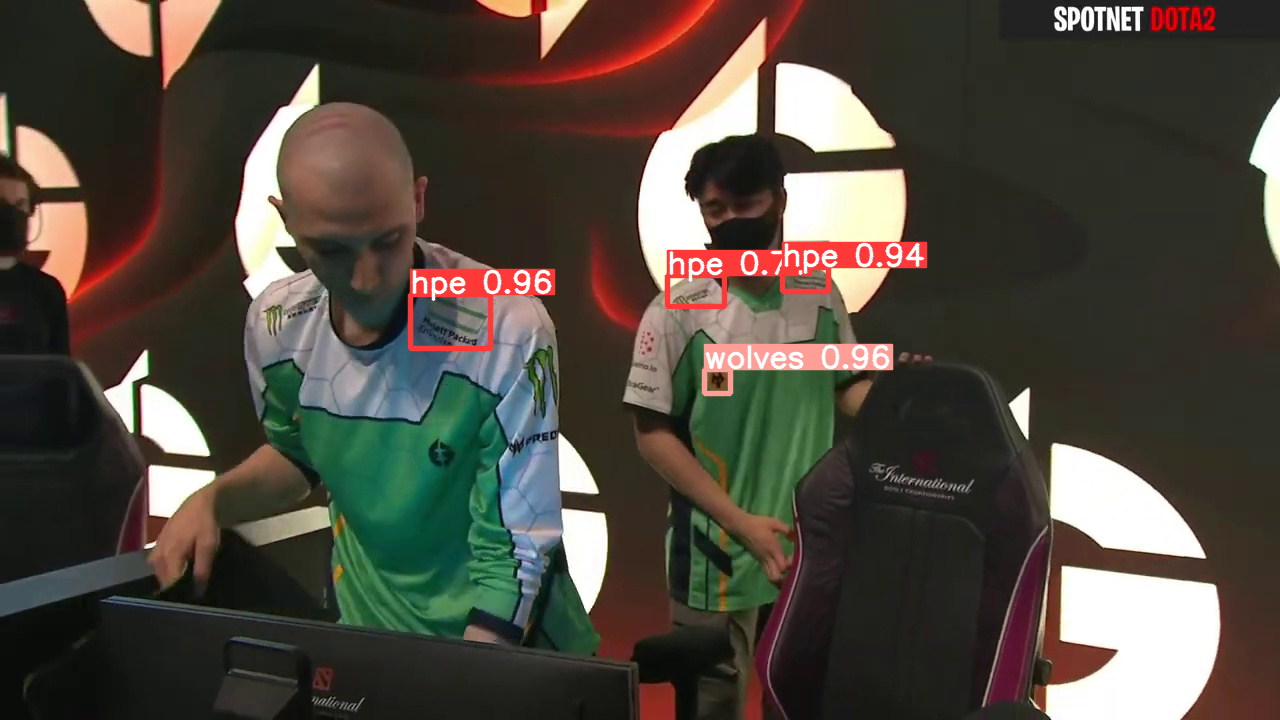

In [ ]:
# display results via image
from PIL import Image

im1 = Image.open(img_path)
results = model([im1], size=640)
results.show()